# Packages

In [1]:
### Import packages ###
import time
import numpy as np
import math as math
import pandas as pd
import random as random

### Append Path ###
import sys
sys.path.append('..')

### Import functions ###
from utils.Main import *
from utils.Selector import *
from utils.Auxiliary import *
from utils.Prediction import *

# Input 

In [2]:
# DataType = "COMPAS"
# RashomonBoundAdder = 0.001
RashomonBoundAdder = 0.003

### Set Up ###
StartTime = time.time()
random.seed(0)
np.random.seed(0)

### Generate Data ###
# df = LoadData(DataType)
df = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Data/raw/bar-7.csv")
df = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Data/raw/COMPAS.csv")
df.rename(columns={'recidivate-within-two-years:1': 'Y'}, inplace=True)




In [3]:

### Train Test Candidate Split ###
df_Train, df_Test, df_Candidate = TrainTestCandidateSplit(df, 0.2, 0.2)

## Train TreeFarms ##
config = {"regularization": 0.01, "rashomon_bound_adder": RashomonBoundAdder}
TreeFarmsModel = TREEFARMS(config)
TreeFarmsModel.fit(df.loc[:, df.columns != "Y"], df["Y"])
# TreeFarmsModel.fit(df_Train.loc[:, df_Train.columns != "Y"], df_Train["Y"])
TreeCounts = TreeFarmsModel.get_tree_count()


null
Finding Optimal Objective...
treefarms reported successful execution
training completed. Number of trees in the Rashomon set: 9
{
  "false": {
    "false": {
      "complexity": 0.009999999776482582,
      "loss": 0.021861879155039787,
      "name": "Y",
      "prediction": 1
    },
    "feature": 7,
    "name": "juvenile-crimes:=0",
    "reference": 1,
    "relation": "==",
    "true": {
      "complexity": 0.009999999776482582,
      "loss": 0.21644708514213562,
      "name": "Y",
      "prediction": 0
    },
    "type": "integral"
  },
  "feature": 11,
  "model_objective": 0.3748675286769867,
  "name": "priors:>3",
  "reference": 1,
  "relation": "==",
  "true": {
    "complexity": 0.009999999776482582,
    "loss": 0.10655856132507324,
    "name": "Y",
    "prediction": 1
  },
  "type": "integral"
}
{
  "false": {
    "complexity": 0.009999999776482582,
    "loss": 0.03938033804297447,
    "name": "Y",
    "prediction": 1
  },
  "feature": 7,
  "model_objective": 0.374867528676

In [4]:
print("TreeCounts: "  + str(TreeCounts))

TreeCounts: 9


In [5]:
AllErrors = []
for i in range(TreeCounts):
    TreePrediction = TreeFarmsModel[i].predict(df_Test.loc[:, df_Test.columns != "Y"])
    AllErrors.append(float(np.mean(TreePrediction!= df_Test["Y"])))

In [6]:
AllErrors

[0.34876989869753977,
 0.34876989869753977,
 0.35238784370477566,
 0.35238784370477566,
 0.35238784370477566,
 0.35238784370477566,
 0.35238784370477566,
 0.3465991316931983,
 0.3465991316931983]

In [7]:
list(set(AllErrors))

[0.34876989869753977, 0.35238784370477566, 0.3465991316931983]

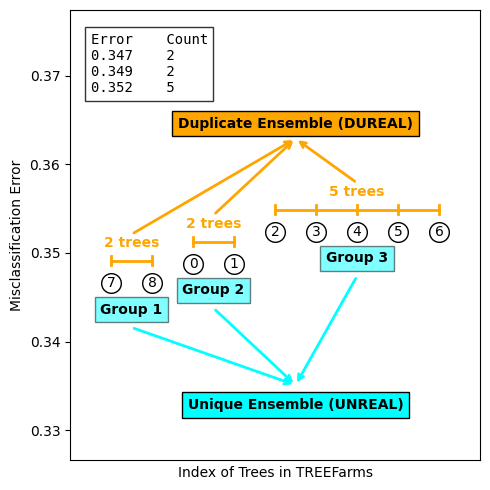

In [8]:
PlotTreeFarmsDecisionTreeErrorsWithGroups(AllErrors=AllErrors, epsilon = 0.0025)

# Generating Classification Patterns

In [ ]:
# # Define groups and their associated tree indices
# groups = {
#     "Group 1": [7,8],
#     "Group 2": [0,1],
#     "Group 3": [2,3,4,5,6]
# }

# # Define colors for each group
# group_colors = {
#     "Group 1": 'lightgreen',
#     "Group 2": 'violet',
#     "Group 3": 'lightcoral'
# }
# ## # For loop for generating the decision trees ###

# for tree in range(0, TreeFarmsModel.get_tree_count()):
#     print(tree)
#     G = nx.DiGraph()
#     add_nodes_and_edges(graph = G, data = json.loads(TreeFarmsModel[tree].json()), df_columns= df.columns)
#     draw_decision_tree(G, tree_index=tree, 
#                        groups = groups, 
#                        group_colors = group_colors, 
#                        filename=f"/Users/simondn/Documents/RashomonActiveLearning/Images/Methods/TreesClassificationPatterns/Tree{tree}.png")

0
1
2
3
4
5
6
7
8
